In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import sys
sys.path.append('/home/addisu/Desktop/10 academy/Telecom/Script')
from user_overview_analysis import fetch_data_into_dataframe, check_missing_values,get_column_names, preprocess_data,analyze_handsets,boxplot_for_outliers, fix_outliers

Top 10 handsets used by the customers:
Handset Type
Huawei B528S-23A                19373
Apple iPhone 6S (A1688)          9369
Apple iPhone 6 (A1586)           8967
undefined                        8817
Apple iPhone 7 (A1778)           6240
Apple iPhone Se (A1723)          5151
Apple iPhone 8 (A1905)           4961
Apple iPhone Xr (A2105)          4542
Samsung Galaxy S8 (Sm-G950F)     4404
Apple iPhone X (A1901)           3788
Name: count, dtype: int64


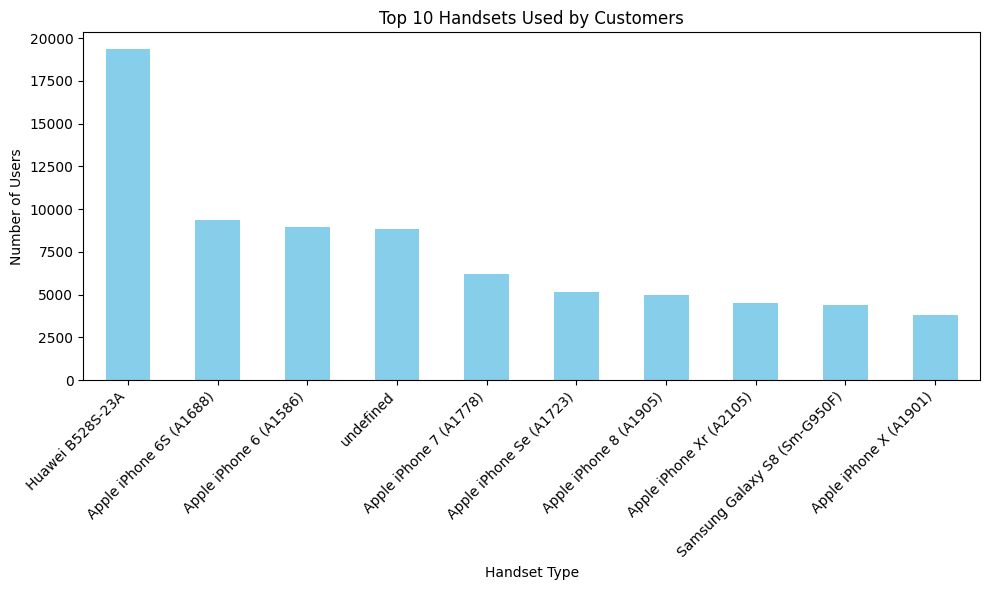

Top 3 handset manufacturers:
Handset Manufacturer
Apple      59072
Samsung    39897
Huawei     33754
Name: count, dtype: int64


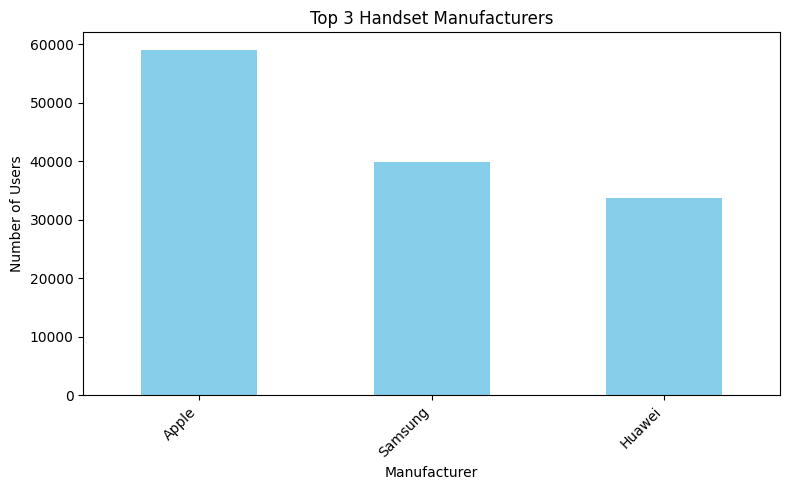

Top 5 Handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9369
Apple iPhone 6 (A1586)     8967
Apple iPhone 7 (A1778)     6240
Apple iPhone Se (A1723)    5151
Apple iPhone 8 (A1905)     4961
Name: count, dtype: int64


Top 5 Handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4404
Samsung Galaxy A5 Sm-A520F      3672
Samsung Galaxy J5 (Sm-J530)     3663
Samsung Galaxy J3 (Sm-J330)     3431
Samsung Galaxy S7 (Sm-G930X)    3106
Name: count, dtype: int64


Top 5 Handsets for Huawei:
Handset Type
Huawei B528S-23A                  19373
Huawei E5180                       2062
Huawei P20 Lite Huawei Nova 3E     2000
Huawei P20                         1471
Huawei Y6 2018                      984
Name: count, dtype: int64




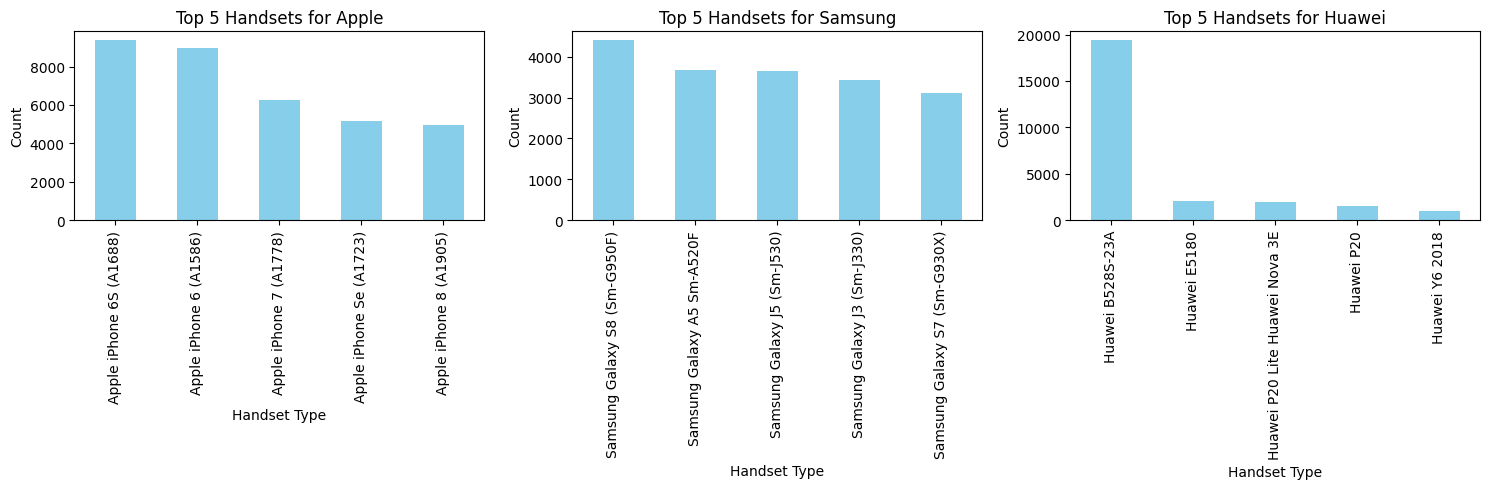

In [3]:
# Specify the path to the data file
file_path = '../data/cleaned_data.csv'

# Call the function to analyze the handsets
analyze_handsets(file_path)

## number of xDR sessions

In [5]:
# Load the data into a DataFrame
df = pd.read_csv(file_path)
# Group by user (IMSI) and count the number of xDR sessions
sessions_count = df.groupby('IMSI').size().reset_index(name='Number of xDR sessions')

# Display the number of xDR sessions for each user
print(sessions_count)

               IMSI  Number of xDR sessions
0      2.082008e+14                    9599
1      2.082009e+14                       2
2      2.082009e+14                       2
3      2.082009e+14                       1
4      2.082009e+14                       1
...             ...                     ...
96033  2.082022e+14                       1
96034  2.082022e+14                       1
96035  2.082022e+14                       1
96036  2.082022e+14                       1
96037  2.082023e+14                    3427

[96038 rows x 2 columns]


## Session duration

In [6]:
# Convert 'Start' and 'End' columns to datetime
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

# Calculate session duration in milliseconds
df['Session Duration (ms)'] = df['End'] - df['Start']

# Convert session duration from milliseconds to seconds for better readability
df['Session Duration (s)'] = df['Session Duration (ms)'] / 1000

# Display the dfFrame with session duration
print(df[['Start', 'End', 'Session Duration (ms)', 'Session Duration (s)']])

                     Start                 End Session Duration (ms)  \
0      2019-04-15 00:32:00 2019-04-25 00:40:00      10 days 00:08:00   
1      2019-04-15 10:30:00 2019-04-25 06:14:00       9 days 19:44:00   
2      2019-04-15 11:33:00 2019-04-25 18:44:00      10 days 07:11:00   
3      2019-04-15 12:20:00 2019-04-25 08:40:00       9 days 20:20:00   
4      2019-04-16 00:35:00 2019-04-25 00:40:00       9 days 00:05:00   
...                    ...                 ...                   ...   
146877 2019-04-29 07:28:00 2019-04-30 00:01:00       0 days 16:33:00   
146878 2019-04-29 07:28:00 2019-04-30 06:02:00       0 days 22:34:00   
146879 2019-04-29 07:28:00 2019-04-30 10:41:00       1 days 03:13:00   
146880 2019-04-29 07:28:00 2019-04-30 10:46:00       1 days 03:18:00   
146881 2019-04-29 07:28:00 2019-04-30 10:40:00       1 days 03:12:00   

         Session Duration (s)  
0      0 days 00:14:24.480000  
1      0 days 00:14:08.640000  
2      0 days 00:14:49.860000  
3      

## the total download (DL) and upload (UL) data

In [7]:
# Group by user (IMSI) and aggregate the total upload and download data
total_data = df.groupby('IMSI').agg({
    'Total UL (Bytes)': 'sum',
    'Total DL (Bytes)': 'sum'
})

# Display the total upload and download data for each user
print(total_data)

              Total UL (Bytes)  Total DL (Bytes)
IMSI                                            
2.082008e+14      3.946892e+11      4.349624e+12
2.082009e+14      1.078175e+08      1.587525e+09
2.082009e+14      8.383354e+07      1.321789e+09
2.082009e+14      3.854688e+07      5.444964e+07
2.082009e+14      3.859903e+07      5.259127e+08
...                        ...               ...
2.082022e+14      5.351915e+07      4.537863e+08
2.082022e+14      2.112148e+07      2.234541e+08
2.082022e+14      3.295407e+07      7.465051e+08
2.082022e+14      2.943168e+07      1.234861e+08
2.082023e+14      1.405625e+11      1.580183e+12

[96038 rows x 2 columns]


## the total data volume (in Bytes) during this session for each application

In [11]:
# Group by user (IMSI) and aggregate the total data volume for each application
total_data_volume_per_app = df.groupby('IMSI').agg({
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
})

# Display the total data volume for each application for each user
print(total_data_volume_per_app)

              Social Media DL (Bytes)  Social Media UL (Bytes)  \
IMSI                                                             
2.082008e+14             1.719547e+10              318328540.0   
2.082009e+14             4.045932e+06                  40466.0   
2.082009e+14             3.491512e+06                  48319.0   
2.082009e+14             6.308670e+05                  40396.0   
2.082009e+14             2.050180e+05                  33838.0   
...                               ...                      ...   
2.082022e+14             2.419754e+06                  18579.0   
2.082022e+14             2.615909e+06                  37401.0   
2.082022e+14             5.879100e+05                  17720.0   
2.082022e+14             2.683777e+06                  22226.0   
2.082023e+14             6.164193e+09              111488167.0   

              Youtube UL (Bytes)  Youtube DL (Bytes)  Netflix DL (Bytes)  \
IMSI                                                             

In [17]:
top_users_per_app = {}
for app in total_data_volume_per_app.columns:
    top_users_per_app[app] = total_data_volume_per_app.nlargest(3, app)

for app, top_users in top_users_per_app.items():
    print(f"Top 3 users for {app}:\n{top_users}\n")

Top 3 users for Social Media DL (Bytes):
              Social Media DL (Bytes)  Social Media UL (Bytes)  \
IMSI                                                             
2.082008e+14             1.719547e+10              318328540.0   
2.082023e+14             6.164193e+09              111488167.0   
2.082014e+14             4.274384e+07                 630942.0   

              Youtube UL (Bytes)  Youtube DL (Bytes)  Netflix DL (Bytes)  \
IMSI                                                                       
2.082008e+14        1.044898e+11        1.116458e+11        1.109128e+11   
2.082023e+14        3.802306e+10        3.973147e+10        4.030312e+10   
2.082014e+14        2.104343e+08        1.640487e+08        1.994792e+08   

              Netflix UL (Bytes)  Google DL (Bytes)  Google UL (Bytes)  \
IMSI                                                                     
2.082008e+14        1.061120e+11       5.569012e+10       1.969028e+10   
2.082023e+14        3.723

## Non-Graphical Univariate Analysis by computing dispersion parameters for each quantitative variable

In [13]:


# Select the quantitative variables for the analysis
quantitative_variables = ['Dur. (ms)', 'Start ms', 'End ms', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 
                          'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 
                          'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 
                          'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', 
                          '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'Activity Duration DL (ms)', 
                          'Activity Duration UL (ms)', 'Dur. (ms).1', 'Nb of sec with Vol DL < 6250B', 
                          'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 
                          'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 
                          'Email DL (Bytes)', 'Email UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 
                          'Total DL (Bytes)', 'Total UL (Bytes)']


# Compute dispersion parameters for each quantitative variable
dispersion_parameters = df[quantitative_variables].agg(['min', 'max', 'mean', 'median', 'var', 'std', 'quantile'])

# Display the computed dispersion parameters
print(dispersion_parameters)


             Dur. (ms)      Start ms        End ms  Avg RTT DL (ms)  \
min       7.142000e+03      0.000000      0.000000         0.000000   
max       2.450710e+05    999.000000    999.000000       121.000000   
mean      1.001780e+05    499.121758    498.649290        54.042551   
median    8.639900e+04    499.000000    500.000000        44.000000   
var       3.477936e+09  83265.159173  82986.661358       968.854257   
std       5.897403e+04    288.557029    288.074055        31.126424   
quantile  8.639900e+04    499.000000    500.000000        44.000000   

          Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
min              0.000000             0.000000e+00             0.000000e+00   
max             29.500000             4.999925e+04             2.769500e+03   
mean             9.300187             1.127431e+04             7.161081e+02   
median           5.000000             6.400000e+01             6.300000e+01   
var             92.360643           

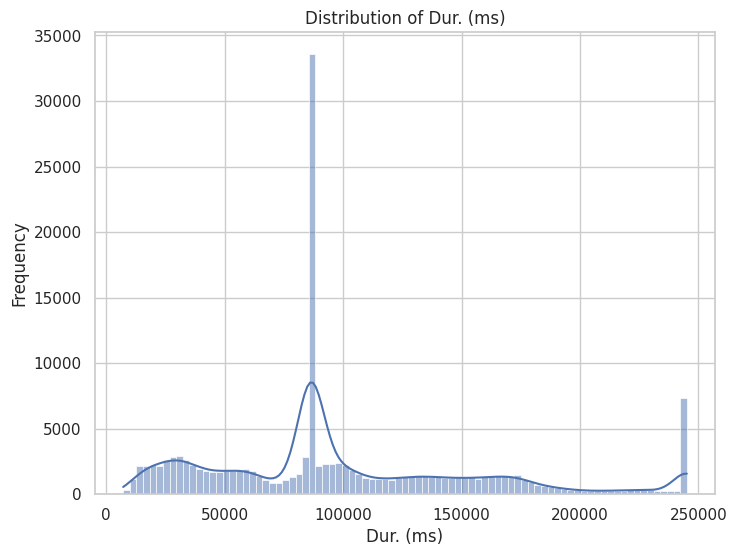

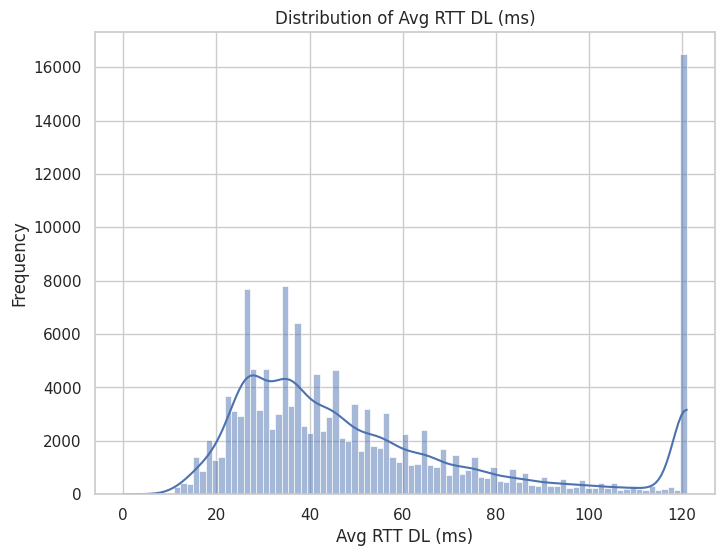

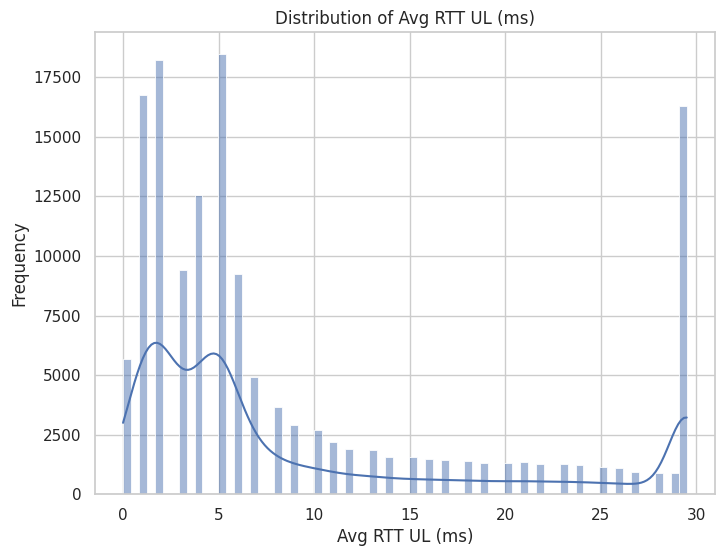

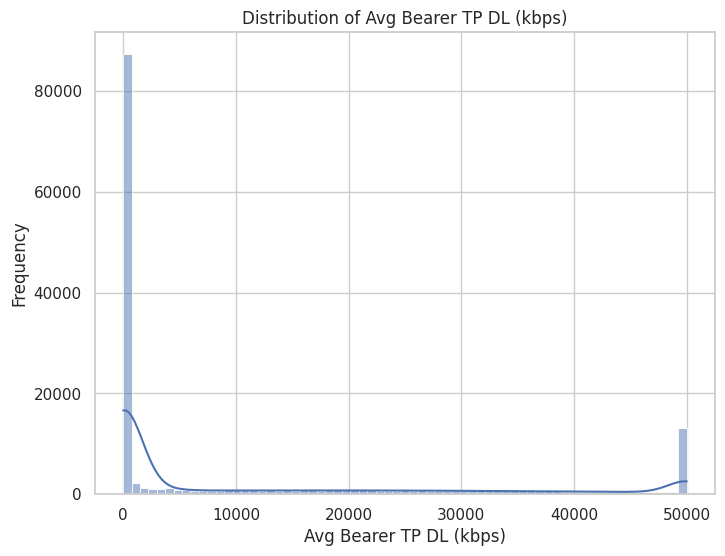

In [18]:
# Set the style of the plots
sns.set(style="whitegrid")

# Select four specific quantitative variables for the analysis
selected_variables = ['Dur. (ms)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)']

# Create subplots for each variable
for var in selected_variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()


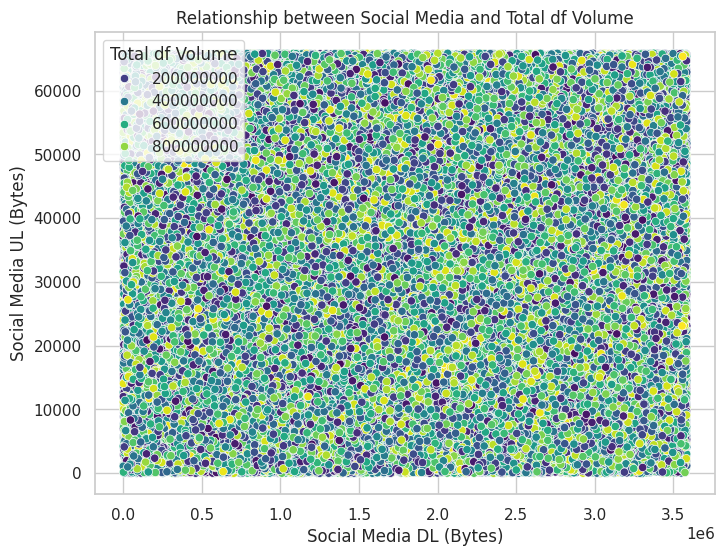

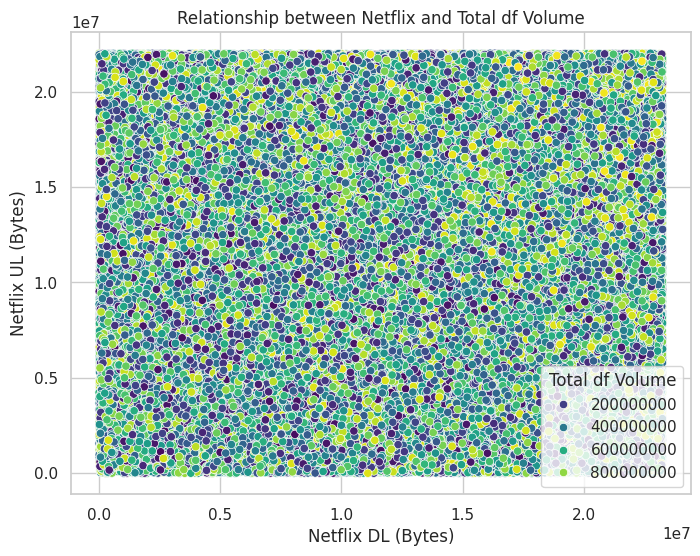

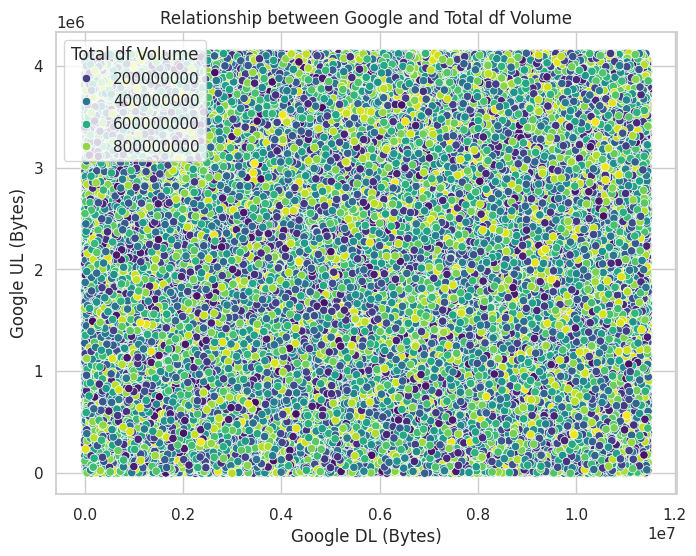

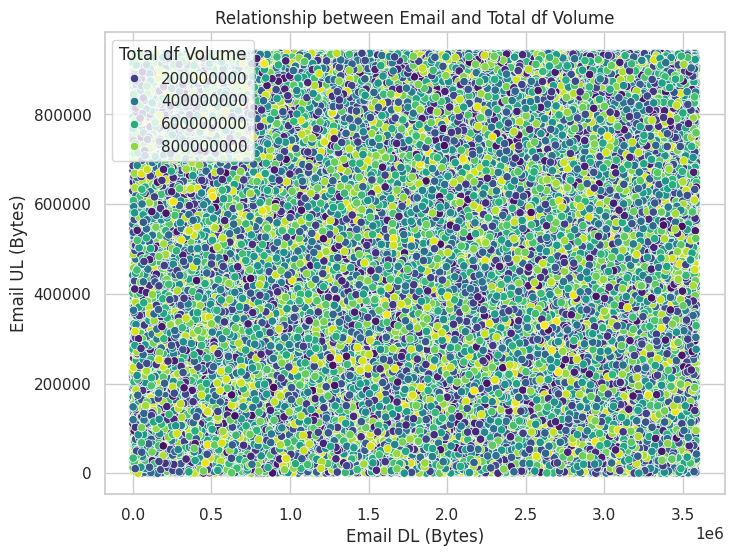

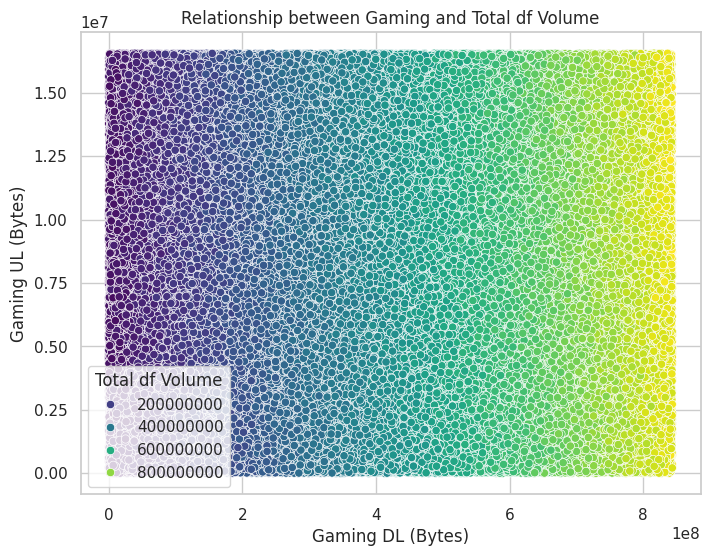

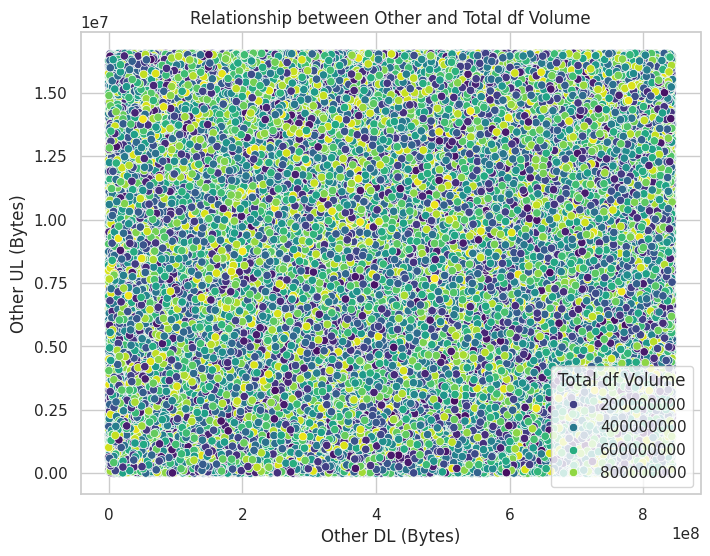

Correlation Matrix:
                         Social Media DL (Bytes)  Netflix DL (Bytes)  \
Social Media DL (Bytes)                 1.000000           -0.001849   
Netflix DL (Bytes)                     -0.001849            1.000000   
Google DL (Bytes)                      -0.002056            0.000768   
Email DL (Bytes)                        0.004952            0.001471   
Gaming DL (Bytes)                       0.001839           -0.003718   
Other DL (Bytes)                        0.005580           -0.004764   
Social Media UL (Bytes)                -0.000234           -0.001107   
Netflix UL (Bytes)                      0.004041            0.001092   
Google UL (Bytes)                      -0.000128           -0.001427   
Email UL (Bytes)                       -0.002685            0.000873   
Gaming UL (Bytes)                       0.003395            0.000233   
Other UL (Bytes)                        0.000961           -0.002613   
Total df Volume                         0.00

In [21]:
# Select the relevant columns for the analysis
applications = ['Social Media', 'Netflix', 'Google', 'Email', 'Gaming', 'Other']
total_df_columns = ['Total DL (Bytes)', 'Total UL (Bytes)']

# Calculate the total data volume (DL+UL) for each application
df['Total df Volume'] = df[total_df_columns].sum(axis=1)

# Create scatter plots to explore the relationship between each application and the total df volume
for app in applications:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[app + ' DL (Bytes)'], y=df[app + ' UL (Bytes)'], hue=df['Total df Volume'], palette='viridis')
    plt.title(f'Relationship between {app} and Total df Volume')
    plt.xlabel(f'{app} DL (Bytes)')
    plt.ylabel(f'{app} UL (Bytes)')
    plt.show()

# Calculate the correlation coefficients between each application's df volume and the total df volume
correlation_matrix = df[[app + ' DL (Bytes)' for app in applications] + [app + ' UL (Bytes)' for app in applications] + ['Total df Volume']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)
